In [89]:
# -*- coding: utf-8 -*-
import numpy as np
from numpy import *
import pandas as pd
import re
import os

In [90]:
try:
    os.chdir('data')
except:
    pass

In [105]:
class Data: 
    __NUMBER_OF_DATA = 1440
    __NAME_OF_LAST_COLUMNS = ''
    __slots__ = ['_name_of_file','_reference','_x','_y','_z','_f','_date','_time','_doy','_time_series','_X_NAME','_Y_NAME','_Z_NAME']
    def __init__(self, f):
        self._name_of_file = str(f)
        self._SetAllData() 
        self.__ProcessData()
        
    def __str__(self):
        return self.name

    #_did_not_dissapear = 0
    def ShowHists(self):
        print(self._time_series[self._X_NAME].hist())
        print(self._time_series[self._Y_NAME].hist())
        print(self._time_series[self._Z_NAME].hist())
        
    def _SetAllData(self):
        #bring all to the lower case
        data = pd.read_csv(self._name_of_file, delimiter = '\n', dtype = 'str', sep = None, header = None)
        data = np.array(data)
        for i in range (len(data)):
            for j in range(len(data[i])):
                data[i][j] = (data[i][j]).lower()
        data = pd.DataFrame(data)
        #select the reference
        self._reference = data[1:13]
        #select the head of the table
        head = str(data.loc[len(data)-(self.__NUMBER_OF_DATA+1)][0]).split()
        head.pop()
        __NAME_OF_LAST_COLUMNS = head[-4:]
        #select the data
        temp_data = np.loadtxt(str(self._name_of_file), delimiter = '\n', dtype=str)
        self._date, self._time, self._doy = np.loadtxt(temp_data[-self.__NUMBER_OF_DATA:], dtype=str, usecols=[0, 1, 2], unpack=True)
        self._x,self._y,self._z,self._f = np.loadtxt(temp_data[-self.__NUMBER_OF_DATA:], dtype=float, usecols=[3,4,5,6], unpack=True)
        #make the table
        data = pd.DataFrame({head[0]:self._date, head[1]:self._time, head[2]:self._doy, head[3]:self._x, head[4]:self._y, head[5]:self._z, head[6]:self._f})
        data = data[-(self.__NUMBER_OF_DATA+1):]
        data = data[head]
        self._X_NAME = head[-4]
        self._Y_NAME = head[-3]
        self._Z_NAME = head[-2]
        #print(self._X_NAME)
        self._time_series = data
        #print(data[data[__NAME_OF_LAST_COLUMNS[0]==99999.0][1]])
        return data
    @property
    def Time_series(self):
        return self._time_series 
    @property
    def X(self):
        return self._x
    @property
    def Y(self):
        return self._y
    @property
    def Z(self):
        return self._z
    @property
    def Date(self):
        return self._date
    @property
    def Time(self):
        return self._time
    @property
    def Doy(self):
        return self._doy
    @property
    def Reference(self):
        return self._reference
    @property
    def Name_of_file(self):
        return self._name_of_file
    
    def __DeleteNulls(self, values):
        values1 = []
        for i in values:
                values1.append(i)
        while(values1.count(99999.0) > 0):
            values1.remove(99999.0)
        while(values1.count(88888.0) > 0):
            values1.remove(88888.0)
        return np.array(values1)
    
    def __ProcessData(self):
        #ф-я удаления нулевых значений
        self._x = self.__DeleteNulls(self._x)
        self._y = self.__DeleteNulls(self._y)
        self._z = self.__DeleteNulls(self._z)
        #print(self.x)


<class 'numpy.ndarray'>
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


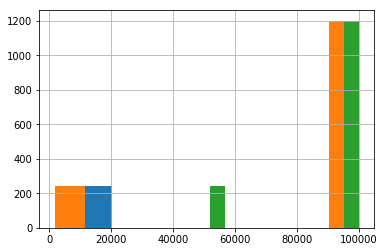

In [106]:
d = Data('abk20170827vmin.min')
d.ShowHists()

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_plot(x, y, z):
    fig1 = plt.figure(figsize=(16, 8))
    xy=plt.scatter(x, y)
    #zy=plt.scatter(z, y)
    #xz=plt.scatter(x, z)
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.ylabel('Z')
    plt.legend([xy], ['XY'])
    plt.show()
    
    
    fig1 = plt.figure(figsize=(16, 8))
    #xy=plt.scatter(x, y)
    zy=plt.scatter(z, y)
    #xz=plt.scatter(x, z)
    plt.xlabel('Z')
    plt.ylabel('Y')
    #plt.ylabel('Z')
    plt.legend([zy], ['ZY'])
    plt.show()
    
    fig1 = plt.figure(figsize=(16, 8))
    #xy=plt.scatter(x, y)
    #zy=plt.scatter(z, y)
    xz=plt.scatter(x, z)
    plt.xlabel('X')
    plt.ylabel('Z')
    #plt.ylabel('Z')
    plt.legend([xz], ['XZ'])
    plt.show()
    

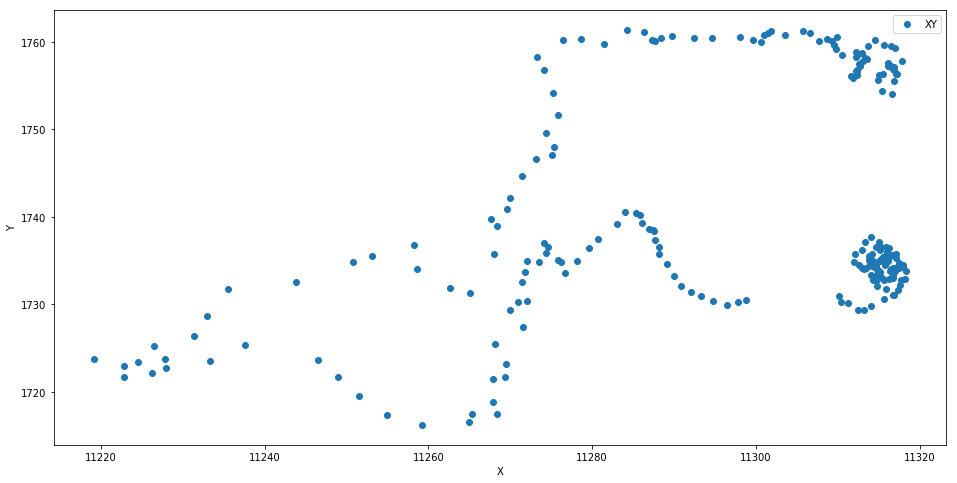

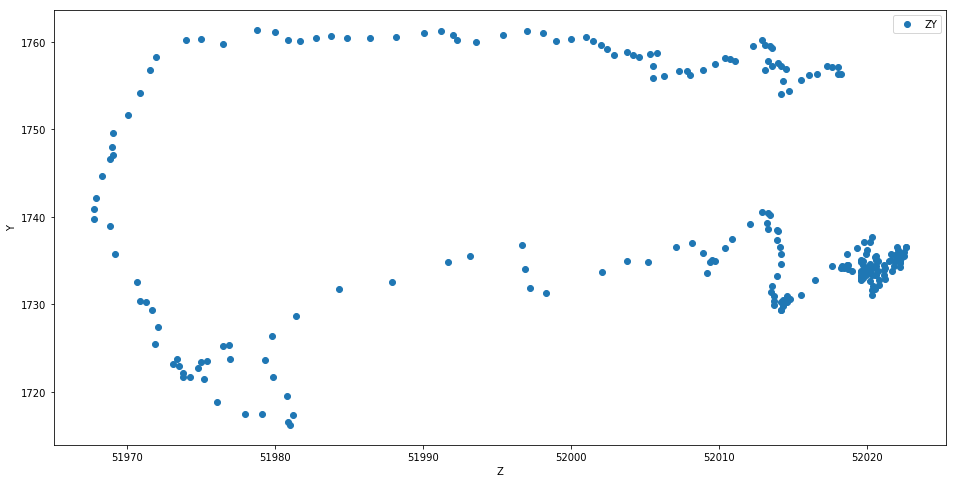

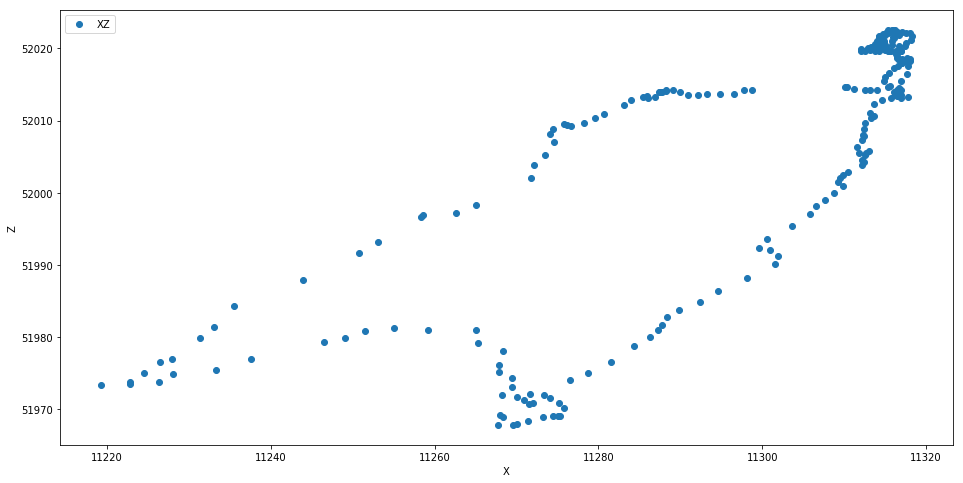

In [54]:
d = Data('abk20170827vmin.min')
show_plot(list(d.X),list(d.Y),list(d.Z))

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using Theano backend.


In [42]:
TrainData()

NameError: name 'TrainData' is not defined

In [43]:
X_train = np.array ([[1,2], [6,5], [8,2]]) 
y_train = np.array ([2,3,7]) 
input_dim = X_train.shape 
print(input_dim)

(3, 2)


In [389]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')#beaut. grap.

In [308]:
def showPlot(x,y,z):
    

In [66]:
def getNumberOfStations():    
    data = {}
    allfiles = os.listdir('.')
    allfiles.remove('log.txt')
    allfiles.remove('conditions_of_use.txt')
    for f in allfiles:
        try:
            d = Data(f)
        except:
            print(f)
    #print(allfiles[0])
    #print(d.__GetData())
    #print(d.GetNameOfFile())
        

In [329]:
('0     station name           hel observatory       ...'.split(r'(\w*)(\s{2,})(\w*)')[0])


'0     station name           hel observatory       ...'

In [ ]:
data = pd.read_csv('cmo20170827vmin.min', delimiter = '\n', dtype = 'str', sep = None, 
                    header = None)
#print(data)
word = 'Station Name'
res = re.search(word + "(\s*)(\w*)", str(data))
print(res.group(0))

In [94]:
data = (str(np.loadtxt('cmo20170827vmin.min'))).lower()
def Parse(word):
    print(word)
    print(data)
    res = re.search(word + "(\s*)(\w*)", data)
    return res.group(3)
   

ValueError: could not convert string to float: Format

In [4]:
import re
r = re.search('\d', '221 f 32')
print(r.group(0))

2


In [2]:
import re
try:
    os.chdir('data')
except:
   pass
data = str(np.loadtxt('abk20170827vmin.min', delimiter = '\n', dtype=str))
res = re.search(r"(Station Name)(\s*)(\w*)", data)
print(res.group(3))


NameError: name 'np' is not defined

In [8]:
import numpy as np
import os
#os.chdir('data')
d = np.loadtxt('abk20170827vmin.min', delimiter = '\n', dtype=str)
print(type(str(d)))

<type 'str'>


In [66]:
 def readCoordsFromOneFile(f):
        data = np.loadtxt(str(f), delimiter = '\n', dtype=str)
        x,y,z = np.loadtxt(data[-1440:], dtype=float, usecols=[3,4,5], unpack=True)
        return x,y,z

In [67]:
readCoordsFromOneFile('abk20170827vmin.min')

(array([ 11307.7,  11308. ,  11308. , ...,  99999. ,  99999. ,  99999. ]),
 array([  1734.5,   1734.5,   1734.4, ...,  99999. ,  99999. ,  99999. ]),
 array([ 52018.7,  52018.6,  52018.3, ...,  99999. ,  99999. ,  99999. ]))

In [18]:
def readAllCoords():
    data = {}
    try:
        os.chdir('data')
    except:
       pass

    allfiles = os.listdir('.') 
    i = 0
    for f in allfiles:
        try:
            d = Data(f)
        except:
           pass        
    return data

In [19]:
readAllCoords()

{}

In [57]:

for key in data.keys():
    print(key)

tuc20170827vmin.min
bel20170827vmin.min
hua20170827vmin.min
pst20170827pmin.min
lrm20170827pmin.min
tam20170827vmin.min
fur20170827vmin.min
frd20170827vmin.min
pag20170827pmin.min
sod20170827vmin.min
lon20170827vmin.min
bsl20170827vmin.min
hlp20170827vmin.min
hrn20170827vmin.min
phu20170827vmin.min
lyc20170827vmin.min
eyr20170827pmin.min
ded20170827vmin.min
asc20170827pmin.min
shu20170827vmin.min
cki20170827pmin.min
new20170827vmin.min
ppt20170827vmin.min
frn20170827vmin.min
mcq20170827pmin.min
cnb20170827pmin.min
asp20170827pmin.min
sua20170827pmin.min
kdu20170827pmin.min
dlt20170827vmin.min
wic20170827pmin.min
sba20170827pmin.min
brd20170827vmin.min
ngk20170827pmin.min
dou20170827vmin.min
nur20170827pmin.min
sfs20170827vmin.min
brw20170827vmin.min
teo20170827vmin.min
gui20170827vmin.min
abk20170827vmin.min
maw20170827pmin.min
ups20170827vmin.min
sbl20170827pmin.min
cta20170827pmin.min
gua20170827vmin.min
gan20170827vmin.min
kou20170827vmin.min
cmo20170827vmin.min
gng20170827pmin.min
